In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, kpss
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
tsla_data = pd.read_csv('../data/TSLA_data_cleaned.csv')

In [34]:
tsla_data.head

<bound method NDFrame.head of       Date                     Date.1        Open        High         Low  \
0        0  2015-01-02 00:00:00+00:00   14.620667   14.620667   14.883333   
1        1  2015-01-05 00:00:00+00:00   14.006000   14.006000   14.433333   
2        2  2015-01-06 00:00:00+00:00   14.085333   14.085333   14.280000   
3        3  2015-01-07 00:00:00+00:00   14.063333   14.063333   14.318667   
4        4  2015-01-08 00:00:00+00:00   14.041333   14.041333   14.253333   
...    ...                        ...         ...         ...         ...   
2469  2469  2024-10-24 00:00:00+00:00  260.480011  260.480011  262.119995   
2470  2470  2024-10-25 00:00:00+00:00  269.190002  269.190002  269.489990   
2471  2471  2024-10-28 00:00:00+00:00  262.510010  262.510010  273.540009   
2472  2472  2024-10-29 00:00:00+00:00  259.519989  259.519989  264.980011   
2473  2473  2024-10-30 00:00:00+00:00  257.549988  257.549988  263.350006   

           Close   Adj Close     Volume  
0  

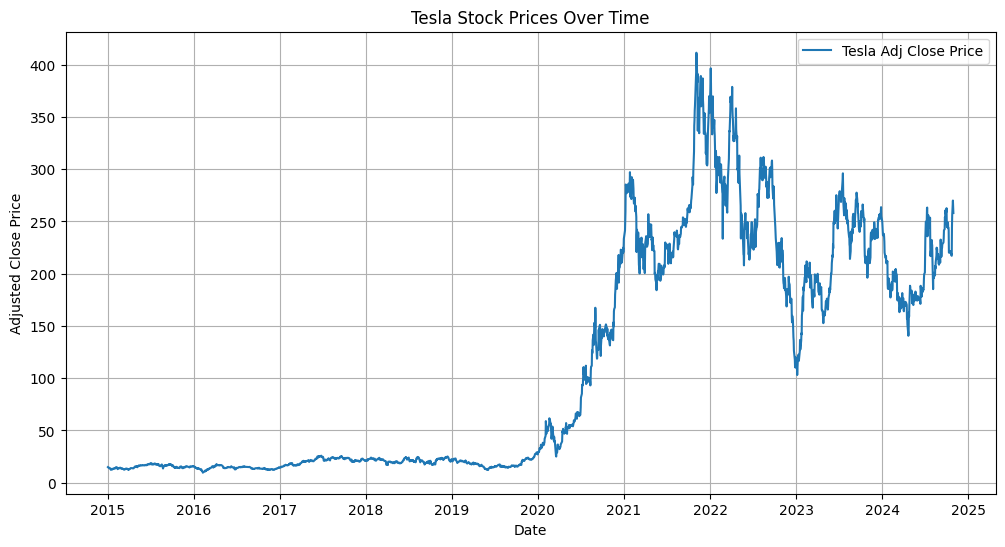

ADF Statistic: -1.2077635687688502
p-value: 0.6702471357749107


In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Parse the 'Date.1' column as datetime
tsla_data['Date.1'] = pd.to_datetime(tsla_data['Date.1'])

# Set 'Date.1' as the index
tsla_data.set_index('Date.1', inplace=True)

# Plot the Adjusted Close prices
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Adj Close'], label='Tesla Adj Close Price')
plt.title("Tesla Stock Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Adjusted Close Price")
plt.legend()
plt.grid(True)
plt.show()


# Check for stationarity (required for ARIMA/SARIMA)
result = adfuller(tsla_data['Adj Close'].dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

**Interpretation:**

The Augmented Dickey-Fuller (ADF) test checks the null hypothesis (H₀) that a time series has a unit root, indicating non-stationarity.

**p-value > 0.05:**
* The p-value is higher than 0.05, signifying that we fail to reject the null hypothesis at a 5% significance level. 
* This suggests that the `Adj Close` series is non-stationary.

**ADF Statistic:**
* The ADF statistic is not significantly lower than the critical values for stationarity, further supporting the conclusion of non-stationarity in the series.

In [36]:
tsla_data['Adj Close Diff'] = tsla_data['Adj Close'].diff()
result_diff = adfuller(tsla_data['Adj Close Diff'].dropna())
print(f"ADF Statistic (Differenced): {result_diff[0]}")
print(f"p-value (Differenced): {result_diff[1]}")

ADF Statistic (Differenced): -9.908203309903502
p-value (Differenced): 3.2210430703365775e-17


In [37]:
tsla_data['Adj Close Log'] = np.log(tsla_data['Adj Close'])
result_log = adfuller(tsla_data['Adj Close Log'].dropna())
print(f"ADF Statistic (Log): {result_log[0]}")
print(f"p-value (Log): {result_log[1]}")


ADF Statistic (Log): -0.7797290422850279
p-value (Log): 0.8250041138913595


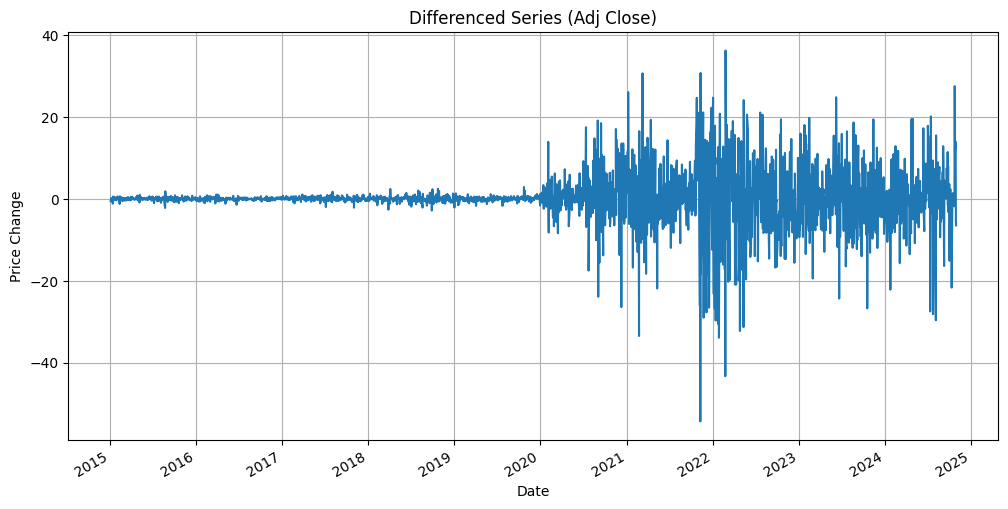

In [38]:
tsla_data['Adj Close Diff'].dropna().plot(figsize=(12, 6), title="Differenced Series (Adj Close)", xlabel="Date", ylabel="Price Change", grid=True)
plt.show()


In [39]:
tsla_data

,Date,Open,High,Low,Close,Adj Close,Volume,Adj Close Diff,Adj Close Log
Date.1,,,,,,,,,
2015-01-02 00:00:00+00:00,0,14.620667,14.620667,14.883333,14.217333,14.858000,71466000,NaN,2.698538
2015-01-05 00:00:00+00:00,1,14.006000,14.006000,14.433333,13.810667,14.303333,80527500,-0.554667,2.660493
2015-01-06 00:00:00+00:00,2,14.085333,14.085333,14.280000,13.614000,14.004000,93928500,-0.299334,2.639343
2015-01-07 00:00:00+00:00,3,14.063333,14.063333,14.318667,13.985333,14.223333,44526000,0.219334,2.654884
2015-01-08 00:00:00+00:00,4,14.041333,14.041333,14.253333,14.000667,14.187333,51637500,-0.036000,2.652350
...,...,...,...,...,...,...,...,...,...
2024-10-24 00:00:00+00:00,2469,260.480011,260.480011,262.119995,242.649994,244.679993,204491900,27.549988,5.499951
2024-10-25 00:00:00+00:00,2470,269.190002,269.190002,269.489990,255.320007,256.010010,161611900,11.330017,5.545217
2024-10-28 00:00:00+00:00,2471,262.510010,262.510010,273.540009,262.239990,270.000000,107653600,13.989990,5.598422


In [40]:
# Fitting ARIMA Model
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(tsla_data['Adj Close'], order=(5, 1, 2))  # Example parameters; tune based on ACF/PACF plots or grid search
arima_model = model.fit()
print(arima_model.summary())


c:\Users\Hermela\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Hermela\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:              Adj Close   No. Observations:                 2474
Model:                 ARIMA(5, 1, 2)   Log Likelihood               -8016.186
Date:                Tue, 19 Nov 2024   AIC                          16048.371
Time:                        10:17:32   BIC                          16094.877
Sample:                             0   HQIC                         16065.264
                               - 2474                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0039      0.080     -0.049      0.961      -0.161       0.154
ar.L2          0.9407      0.078     12.066      0.000       0.788       1.094
ar.L3          0.0464      0.018      2.576      0.0

c:\Users\Hermela\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [50]:
# Forecasting future values
forecast = arima_model.forecast(steps=60)  # Forecasting 60 days ahead
forecast.index = pd.date_range(tsla_data.index[-1] + pd.Timedelta(days=1), periods=60)

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(tsla_data['Adj Close'], label='Historical Data')
plt.plot(forecast, label='60-Day Forecast', color='red')
plt.title('Brent Oil Price Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

c:\Users\Hermela\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Hermela\Documents\10-Academy\GMF-portfolio-optimization--WEEK11\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


KeyError: 'Adj Close'

<Figure size 1200x600 with 0 Axes>

In [42]:
tsla_data = tsla_data['Adj Close']

In [43]:
tsla_data

Date.1
2015-01-02 00:00:00+00:00     14.858000
2015-01-05 00:00:00+00:00     14.303333
2015-01-06 00:00:00+00:00     14.004000
2015-01-07 00:00:00+00:00     14.223333
2015-01-08 00:00:00+00:00     14.187333
                                ...    
2024-10-24 00:00:00+00:00    244.679993
2024-10-25 00:00:00+00:00    256.010010
2024-10-28 00:00:00+00:00    270.000000
2024-10-29 00:00:00+00:00    264.510010
2024-10-30 00:00:00+00:00    258.040009
Name: Adj Close, Length: 2474, dtype: float64

In [44]:
adf_result = adfuller(tsla_data)
print(adf_result[1])

0.6702471357749107


In [45]:
tsla_data.describe().T

count    2474.000000
mean      111.461872
std       110.208156
min         9.488000
25%        17.058499
50%        24.986667
75%       217.264999
max       411.470001
Name: Adj Close, dtype: float64

In [49]:
kpss_result = kpss(tsla_data)
print(kpss_result[1])

0.01


C:\Users\Hermela\AppData\Local\Temp\ipykernel_15736\475238061.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(tsla_data)


In [53]:
result = seasonal_decompose(tsla_data, model='additive')
result.plot()
plt.show()

ValueError: You must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None

# newwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwwww

In [59]:
tsla_df = pd.read_csv('../data/TSLA_data_cleaned.csv')
tsla_df

,Date,Date.1,Open,High,Low,Close,Adj Close,Volume
0,0,2015-01-02 00:00:00+00:00,14.620667,14.620667,14.883333,14.217333,14.858000,71466000
1,1,2015-01-05 00:00:00+00:00,14.006000,14.006000,14.433333,13.810667,14.303333,80527500
2,2,2015-01-06 00:00:00+00:00,14.085333,14.085333,14.280000,13.614000,14.004000,93928500
3,3,2015-01-07 00:00:00+00:00,14.063333,14.063333,14.318667,13.985333,14.223333,44526000
4,4,2015-01-08 00:00:00+00:00,14.041333,14.041333,14.253333,14.000667,14.187333,51637500
...,...,...,...,...,...,...,...,...
2469,2469,2024-10-24 00:00:00+00:00,260.480011,260.480011,262.119995,242.649994,244.679993,204491900
2470,2470,2024-10-25 00:00:00+00:00,269.190002,269.190002,269.489990,255.320007,256.010010,161611900
2471,2471,2024-10-28 00:00:00+00:00,262.510010,262.510010,273.540009,262.239990,270.000000,107653600
2472,2472,2024-10-29 00:00:00+00:00,259.519989,259.519989,264.980011,255.509995,264.510010,80521800


In [60]:
tsla_df = tsla_df[['Date.1', 'Adj Close']]
# Convert the 'Date' column to datetime
tsla_df['Date.1'] = pd.to_datetime(tsla_df['Date.1'])
tsla_df = tsla_df.set_index(tsla_df['Date.1']).drop('Date.1', axis=1)
tsla_df.head()

C:\Users\Hermela\AppData\Local\Temp\ipykernel_15736\1163817524.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla_df['Date.1'] = pd.to_datetime(tsla_df['Date.1'])


,Adj Close
Date.1,
2015-01-02 00:00:00+00:00,14.858000
2015-01-05 00:00:00+00:00,14.303333
2015-01-06 00:00:00+00:00,14.004000
2015-01-07 00:00:00+00:00,14.223333
2015-01-08 00:00:00+00:00,14.187333


In [61]:
tsla_df = tsla_df.resample("MS").last()

In [ ]:
tsla_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Adj Close,118.0,113.260113,112.004238,12.34,16.874833,25.623667,220.782497,381.456665


In [63]:
from sktime.utils.plotting import plot_series
plot_series(tsla_df, markers=' ')

ModuleNotFoundError: No module named 'sktime'

In [64]:
adf_result = adfuller(tsla_df)
print(adf_result[1])

0.6606174373832763


In [65]:
kpss_result = kpss(tsla_df)
print(kpss_result[1])

0.01


C:\Users\Hermela\AppData\Local\Temp\ipykernel_15736\80085225.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(tsla_df)


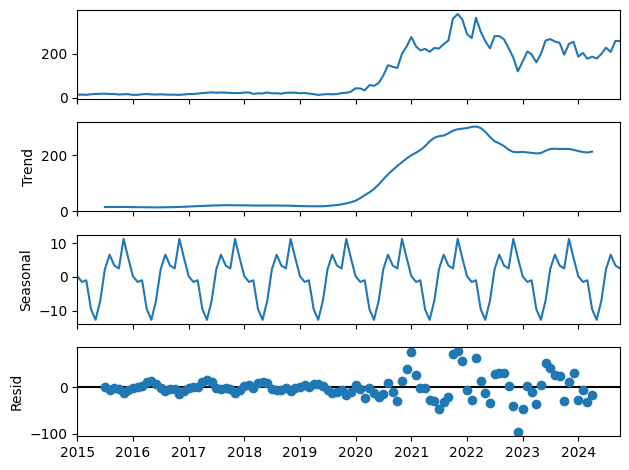

In [66]:
result = seasonal_decompose(tsla_df, model='additive')
result.plot()
plt.show()

In [ ]:
# Machine Learning and Forecasting Libraries
import pmdarima as pm
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sktime.split import temporal_train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
train, test = temporal_train_test_split(tsla_df, test_size=24)

In [ ]:
model = ARIMA(train, order=(1,1,0))
model_fit = model.fit()
print(model_fit.summary())

In [ ]:
history = train
predictions = list()
# walk-forward validation
for t in range(len(test),0,-1):
    model = ARIMA(tsla_df[:-t], order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output.iloc[0]
    predictions.append(yhat)

In [ ]:
test.loc[:,'predictions'] = predictions.copy()

plt.plot(test['predictions'], color='red', label='prediction')
plt.plot(test['Adj Close'], color='blue', label='actual')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# evaluate forecasts
rmse = sqrt(mean_squared_error(test['predictions'], test['Adj Close']))
mae = mean_absolute_error(test['predictions'], test['Adj Close'])
mape = mean_absolute_percentage_error(test['predictions'], test['Adj Close'])

print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)

In [67]:
model_fit.plot_diagnostics(figsize=(14, 6))
plt.show()

NameError: name 'model_fit' is not defined

In [ ]:
history = train
# Make predictions
auto_predictions = model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
test.loc[:, 'auto_predictions'] = auto_predictions.copy()

In [ ]:
plt.plot(test['auto_predictions'], color='red', label='prediction')
plt.plot(test['Adj Close'], color='blue', label='actual')
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Calculate Evaluation Metrics
rmse = sqrt(mean_squared_error(test['auto_predictions'], test['Adj Close']))
mae = mean_absolute_error(test['auto_predictions'], test['Adj Close'])
mape = mean_absolute_percentage_error(test['auto_predictions'], test['Adj Close'])

print('Test RMSE: %.3f' % rmse)
print('Test MAE: %.3f' % mae)
print('Test MAPE: %.3f' % mape)


In [ ]:
Forecast = model_fit.forecast(steps=12)
print(Forecast)